In [25]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#import data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Increase the maximum field size
import csv
#csv.field_size_limit(10000000000)

import warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding='ISO-8859-1', error_bad_lines=False)  ## change to where your file is

In [28]:
# Print the first few rows of the DataFrame
print(df.head())

#dataset dimensions
df.shape

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

(51717, 17)

In [29]:
#Summary statistics
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Check structure of dataset (variable names, data types & count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [31]:
#Dropping 'url' & 'phone' variables
df = df.drop(['url','phone'], axis = 1)
df.describe(include='all')

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,43942,51717.000000,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,11495,8792,2,2,64,NaN,93,93,5271,2723,70,22513,9098,7,30
top,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,128,96,30444,45268,2208,NaN,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Explore missing data percentage
df.isnull().sum()/len(df) *100

address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [33]:
#Dropping 'dish_liked' because of 54% missing values
df = df.drop(['dish_liked'], axis = 1)
df.isnull().sum()/len(df)

address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
location                       0.000406
rest_type                      0.004389
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [34]:
#3 variables have been removed from original dataset
df.shape

(51717, 14)

In [35]:
#Removing duplicate rows (remove 43 rows)
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(51674, 14)

In [36]:
#Remove the NaN values from the dataset (removes 8218 rows)
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.shape


(43499, 14)

In [37]:
#Number of unique values for each variable
df.nunique()

address                         9432
name                            7112
online_order                       2
book_table                         2
rate                              64
votes                           2323
location                          92
rest_type                         87
cuisines                        2487
approx_cost(for two people)       66
reviews_list                   21576
menu_item                       8560
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [38]:
#Changing Columns Names
# 'approx_cost(for two people)' to 'cost'
# 'listed_in(type)' to 'type'
# 'listed_in(city)' to 'city'
# 'rate' to 'rating'
# 'book_table" to 'online_reservation'
df.columns
df = df.rename(columns={'approx_cost(for two people)':'cost',
                        'listed_in(type)':'type',
                        'listed_in(city)':'city',
                        'rate':'rating',
                        'book_table':'online_reservation' })
df.columns



Index(['address', 'name', 'online_order', 'online_reservation', 'rating',
       'votes', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [39]:
#data type transformation
#Change 'cost' date type to float64
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df.info()

df['cost'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             43499 non-null  object 
 1   name                43499 non-null  object 
 2   online_order        43499 non-null  object 
 3   online_reservation  43499 non-null  object 
 4   rating              43499 non-null  object 
 5   votes               43499 non-null  int64  
 6   location            43499 non-null  object 
 7   rest_type           43499 non-null  object 
 8   cuisines            43499 non-null  object 
 9   cost                43499 non-null  float64
 10  reviews_list        43499 non-null  object 
 11  menu_item           43499 non-null  object 
 12  type                43499 non-null  object 
 13  city                43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,   1.7 ,   1.4 ,   1.35,
         2.2 ,   2.  ,   1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,
         3.  ,   2.8 ,   3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,
         2.4 ,   2.6 ,   1.45,  70.  ,   3.2 , 560.  , 240.  , 360.  ,
         6.  ,   1.05,   2.3 ,   4.1 , 120.  ,   5.  ,   3.7 ,   1.65,
         2.7 ,   4.5 ])

In [40]:
#Identifying unique values for 'rate'
df['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [41]:
#data transformation
#Adjusting 'rates' column so the '/5' and 'NEW" is removed
#Change data type to 'float'
df['rating'].unique()
df = df.loc[df.rating != 'NEW']
df = df.loc[df.rating != '-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x
df.rating = df.rating.apply(remove_slash).str.strip().astype('float')
df['rating'].unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [42]:
#Adjust 'name' variable to capitalizes the first letter of each word
#in the string and makes the rest of the letters lowercase.

df.name = df.name.apply(lambda x:x.title())

In [43]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rating', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_encoded = Encode(df.copy())

array([[<Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'online_order'}>,
        <Axes: title={'center': 'online_reservation'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'rest_type'}>],
       [<Axes: title={'center': 'cuisines'}>,
        <Axes: title={'center': 'cost'}>,
        <Axes: title={'center': 'reviews_list'}>,
        <Axes: title={'center': 'menu_item'}>],
       [<Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'city'}>, <Axes: >, <Axes: >]],
      dtype=object)

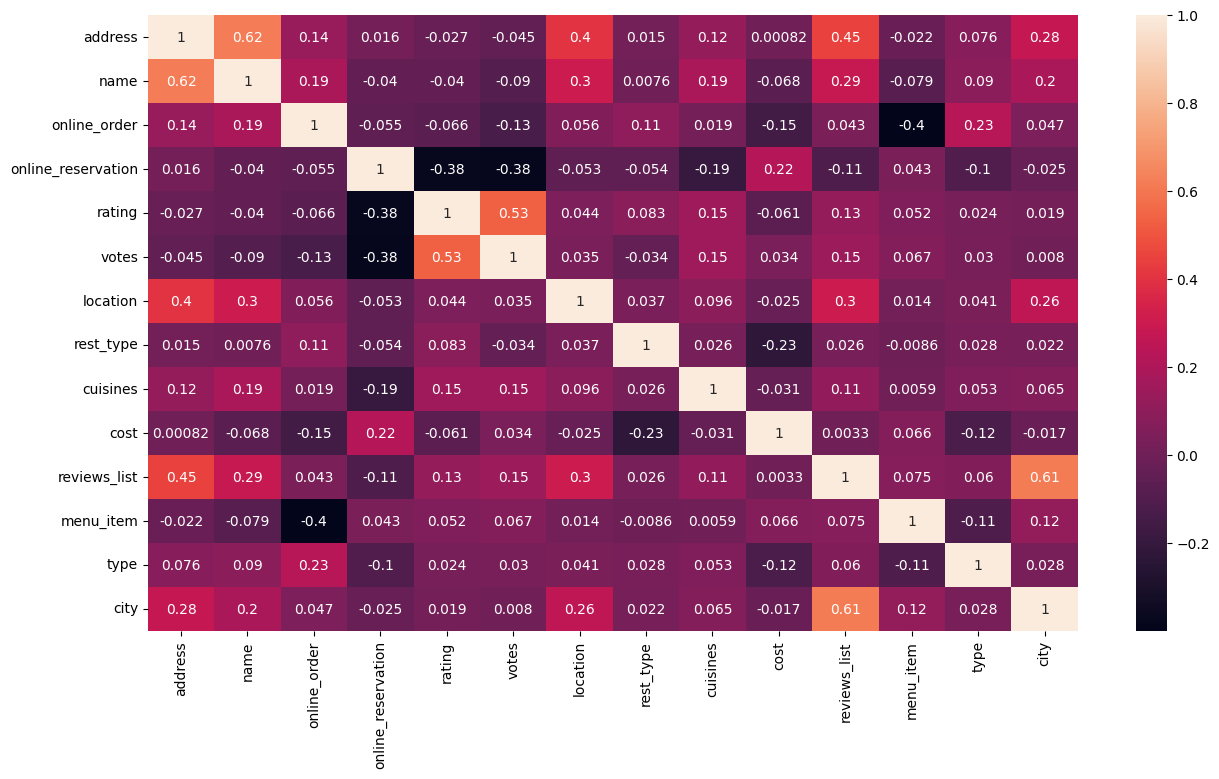

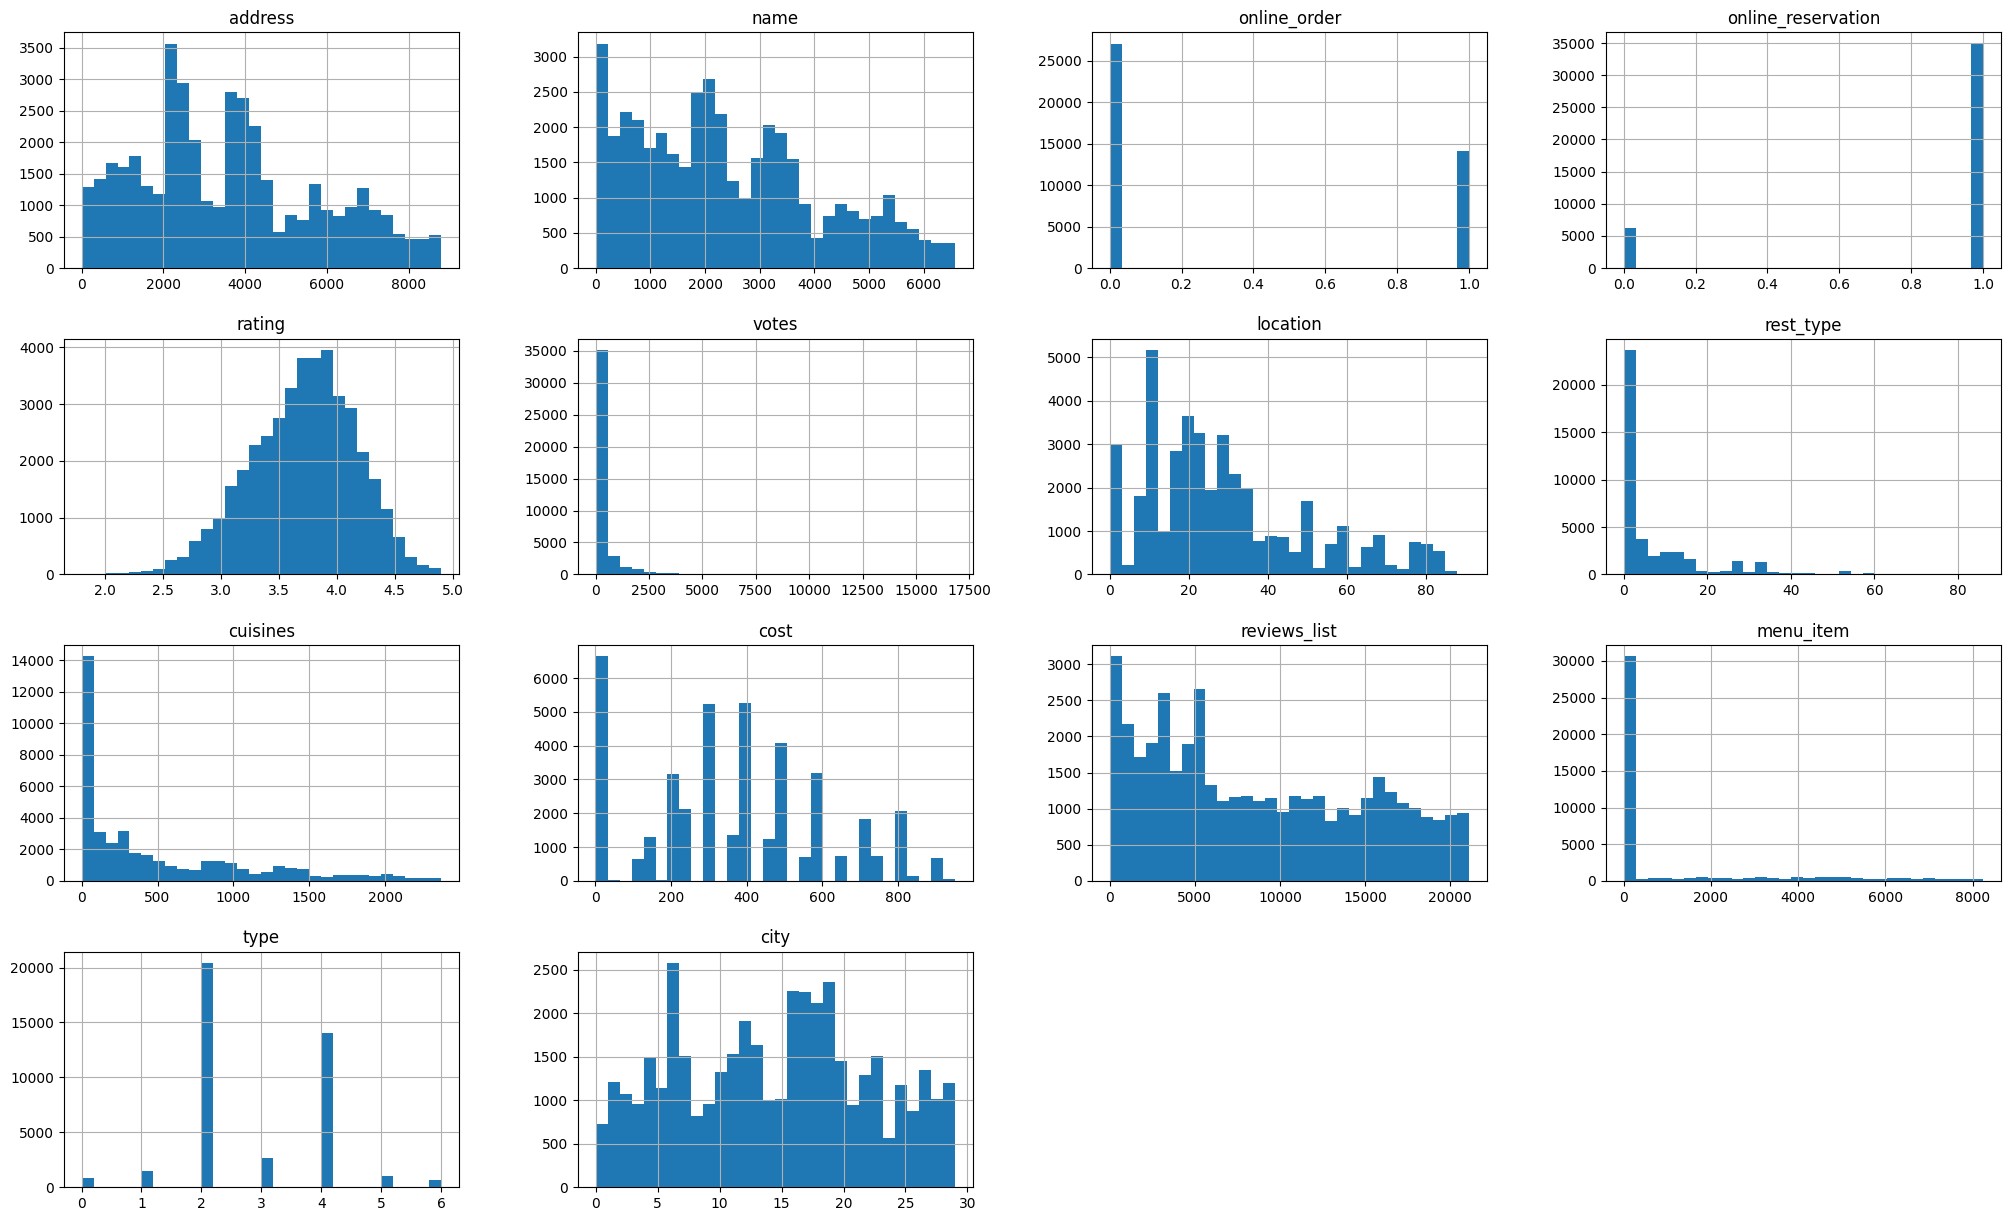

In [44]:
#Visualizing Correlation between variables
corr = df_encoded.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_encoded.columns

df_encoded.skew (axis=0)

df_encoded.hist(bins = 30, figsize=(25,15))

In [45]:
#Check for multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF Dataframe
vif_data = pd.DataFrame()
vif_data ['feature'] = df_encoded.columns

#calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor (df_encoded.values, i)
for i in range(len(df_encoded.columns))]

print(vif_data)

               feature        VIF
0              address  10.146174
1                 name   6.289676
2         online_order   2.007888
3   online_reservation   7.400947
4               rating  17.090113
5                votes   1.534156
6             location   5.141301
7            rest_type   1.679250
8             cuisines   2.122082
9                 cost   3.891610
10        reviews_list   7.701730
11           menu_item   1.606995
12                type   7.043670
13                city   9.921394


In [46]:
## Dropping Address

df_encoded2 = df_encoded.drop(['address'], axis = 1)
df_encoded2.describe (include='all')

,name,online_order,online_reservation,rating,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
count,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000
mean,2412.058903,0.343284,0.847249,3.702030,352.772001,29.328079,8.038776,503.270946,369.586259,8651.516623,1064.507142,2.807309,14.484783
std,1675.999112,0.474811,0.359752,0.440034,884.409230,20.309672,12.456625,576.926143,242.522954,6237.739506,2125.430372,1.170507,7.990330
min,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1001.000000,0.000000,1.000000,3.400000,21.000000,14.000000,2.000000,53.000000,200.000000,3135.000000,0.000000,2.000000,7.000000
50%,2140.000000,0.000000,1.000000,3.700000,73.000000,24.000000,2.000000,253.000000,400.000000,7403.000000,0.000000,2.000000,15.000000
75%,3480.000000,1.000000,1.000000,4.000000,277.000000,39.000000,9.000000,847.000000,500.000000,14111.000000,550.000000,4.000000,20.000000
max,6571.000000,1.000000,1.000000,4.900000,16832.000000,91.000000,86.000000,2366.000000,950.000000,21102.000000,8242.000000,6.000000,29.000000


In [47]:

vif_data2 = pd.DataFrame()
vif_data2 ['feature'] = df_encoded2.columns
vif_data2['VIF'] = [variance_inflation_factor (df_encoded2.values, i)
                    for i in range(len(df_encoded2.columns))]
print(vif_data2)

               feature        VIF
0                 name   4.560288
1         online_order   2.000184
2   online_reservation   7.291416
3               rating  17.038561
4                votes   1.533709
5             location   4.295059
6            rest_type   1.679249
7             cuisines   2.120598
8                 cost   3.875657
9         reviews_list   7.228571
10           menu_item   1.606752
11                type   7.036315
12                city   9.920064


In [48]:
df_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                41237 non-null  int64  
 1   online_order        41237 non-null  int64  
 2   online_reservation  41237 non-null  int64  
 3   rating              41237 non-null  float64
 4   votes               41237 non-null  int64  
 5   location            41237 non-null  int64  
 6   rest_type           41237 non-null  int64  
 7   cuisines            41237 non-null  int64  
 8   cost                41237 non-null  float64
 9   reviews_list        41237 non-null  int64  
 10  menu_item           41237 non-null  int64  
 11  type                41237 non-null  int64  
 12  city                41237 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 4.1 MB


In [49]:
df_encoded2.nunique()

name                   6572
online_order              2
online_reservation        2
rating                   31
votes                  2323
location                 92
rest_type                87
cuisines               2367
cost                     63
reviews_list          21103
menu_item              8243
type                      7
city                     30
dtype: int64

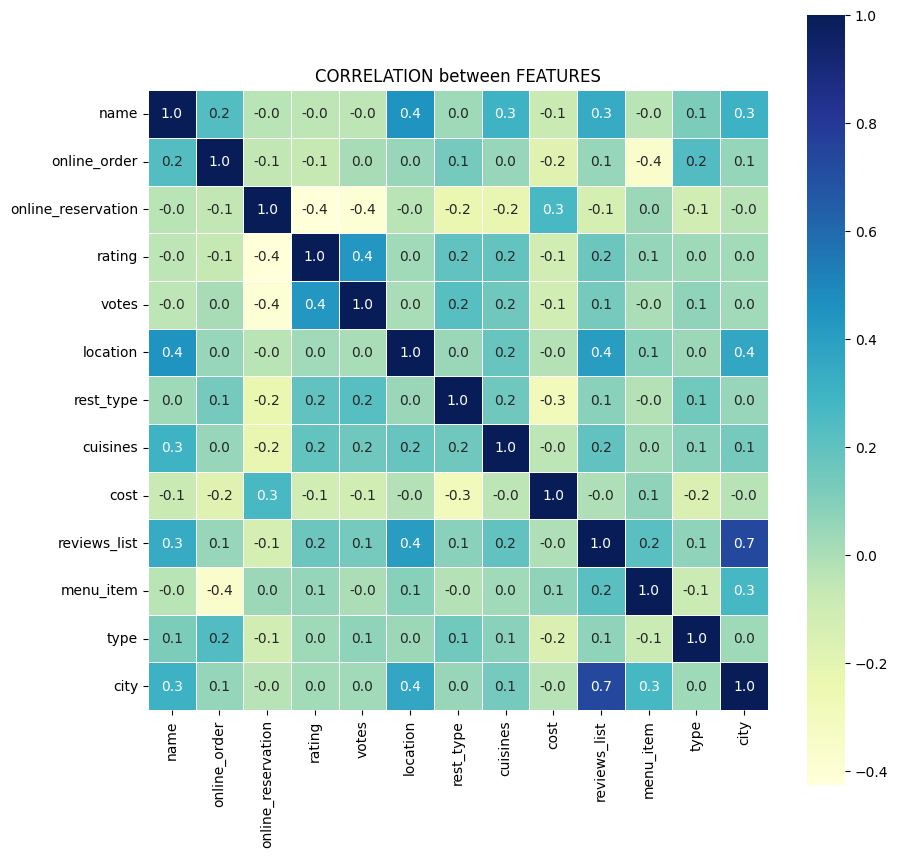

In [50]:
corr=df_encoded2.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".1f",ax=ax,cmap="YlGnBu",square=True)
plt.title("CORRELATION between FEATURES")
plt.show()

In [51]:
y=df_encoded2["rating"]
x=df_encoded2.drop(["rating"],axis=1)
print("Shape of y:",y.shape)
print("Shape of x:",x.shape)

Shape of y: (41237,)
Shape of x: (41237, 12)


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [53]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg=LinearRegression()
linear_reg_Model=linear_reg.fit(X_train,y_train)

In [54]:
print("Train Error: ",np.sqrt(mean_squared_error(y_train,linear_reg_Model.predict(X_train))))
y_pred_linear=linear_reg_Model.predict(X_test)
linear_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_linear))
print("Test Error: ",linear_RMSE)
print("---"*108)
print("R2 SCORE:",linear_reg_Model.score(x,y))
# Assuming X_test and y_test are your testing data set

Train Error:  0.3683109003412634
Test Error:  0.3672570422915678
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R2 SCORE: 0.3002069453879921


In [58]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

random_forest=RandomForestRegressor(max_depth=9,max_features=5,n_estimators=200)
random_forest_Model=random_forest.fit(X_train,y_train)
print("Train Error: ",np.sqrt(mean_squared_error(y_train,random_forest_Model.predict(X_train))))
y_pred_randomForest=random_forest_Model.predict(X_test)
randomForest_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_randomForest))
print("Test Error: ",randomForest_RMSE)
print("---"*108)
print("R2 SCORE:",random_forest_Model.score(x,y))

Train Error:  0.26888046442236424
Test Error:  0.2752128470907271
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R2 SCORE: 0.6230569495176157


In [59]:
# XG Boost

from xgboost import XGBRegressor

xgb=XGBRegressor(colsample_bytree=1,learning_rate=0.5,max_depth=6,n_estimators=1000)
xgb_Model=xgb.fit(X_train,y_train)
print("Train Error: ",np.sqrt(mean_squared_error(y_train,xgb_Model.predict(X_train))))
y_pred_XGB=xgb_Model.predict(X_test)
XGBoost_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_XGB))
print("Test Error: ",XGBoost_RMSE)
print("---"*108)
print("R2 SCORE:",random_forest_Model.score(x,y))

Train Error:  0.019077042470175085
Test Error:  0.13720301179619185
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R2 SCORE: 0.6230569495176157


In [62]:
# Elastic Net

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)

# Generate predictions
y_pred_elastic = model.predict(X_test)
results=pd.DataFrame({"y_actual":y_test,
               "y_pred_linear":y_pred_linear,
               "y_pred_elasticNET":y_pred_elastic,
               "y_pred_randomForest":y_pred_randomForest,
                      "y_pred_XGBOOST":y_pred_XGB
                     })
results

,y_actual,y_pred_linear,y_pred_elasticNET,y_pred_randomForest,y_pred_XGBOOST
10874,3.7,3.652094,3.511834,3.554870,3.391712
25501,3.7,3.943168,3.647393,3.692200,3.697861
3253,2.4,3.674166,3.711255,3.321667,2.614220
18092,3.7,3.562109,3.606986,3.642203,3.772591
30589,4.0,3.742536,3.767760,3.884567,4.089603
...,...,...,...,...,...
6081,4.0,3.592646,3.563234,3.601413,3.876012
8099,3.6,3.642064,3.603645,3.470012,3.516973
9769,4.2,3.805977,3.901716,4.186894,4.212380
23920,3.5,3.509067,3.540102,3.460825,3.493292


In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate RMSE for Elastic Net
elasticNet_RMSE = sqrt(mean_squared_error(y_test, y_pred_elastic))


In [71]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot,plot

models_RMSE=pd.DataFrame({"Models":["Linear Regression","Elastic Net","Random Forest","XGBoost"],
                         "RMSE":[linear_RMSE,elasticNet_RMSE,randomForest_RMSE,XGBoost_RMSE]})
fig = px.bar(models_RMSE, x='RMSE', y='Models',
             labels={'Root Mean Squared Error of Models'},
             hover_data=['RMSE', 'Models'], color='Models',
             height=400)
fig.show()

In [72]:
#evaluate the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize the random forest regressor with the specified hyperparameters
random_forest = RandomForestRegressor(max_depth=9, max_features=5, n_estimators=200)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive, because cross_val_score returns negative values for MSE to maximize them
cv_scores = np.sqrt(-cv_scores)

# Print RMSE for each fold
print("RMSE on each fold:")
print(cv_scores)

# Calculate the average RMSE across all folds
average_rmse = np.mean(cv_scores)
print("Average RMSE across all folds:", average_rmse)


RMSE on each fold:
[0.30175706 0.28330746 0.27509988 0.26546678 0.30079449]
Average RMSE across all folds: 0.28528513300507186


In [73]:
print("Train Error: ",np.sqrt(mean_squared_error(y_train,random_forest_Model.predict(X_train))))
y_pred_randomForest=random_forest_Model.predict(X_test)
randomForest_RMSE=np.sqrt(mean_squared_error(y_test,y_pred_randomForest))
print("Test Error: ",randomForest_RMSE)
print("---"*108)
print("R2 SCORE:",random_forest_Model.score(x,y))

Train Error:  0.26888046442236424
Test Error:  0.2752128470907271
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R2 SCORE: 0.6230569495176157


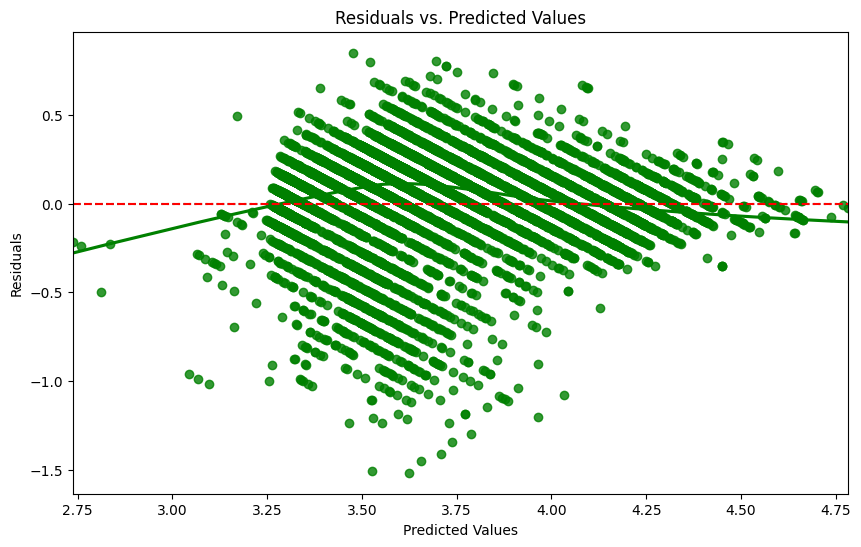

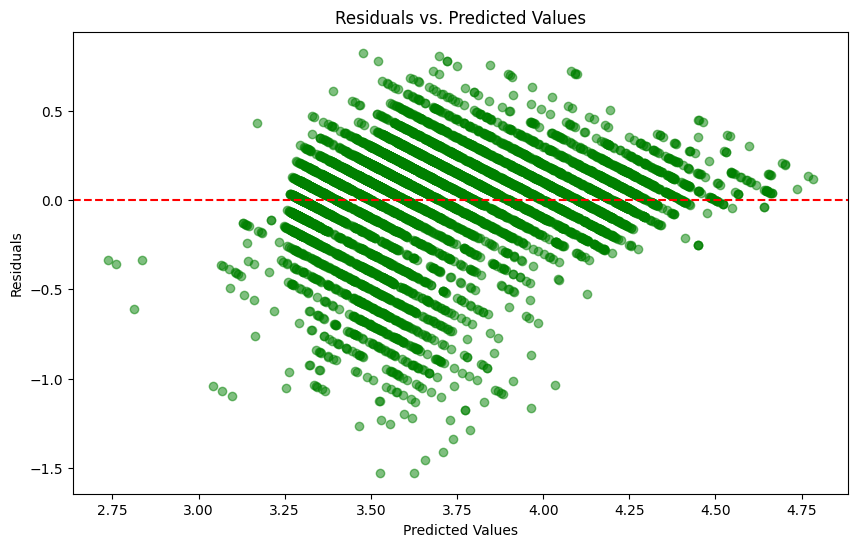

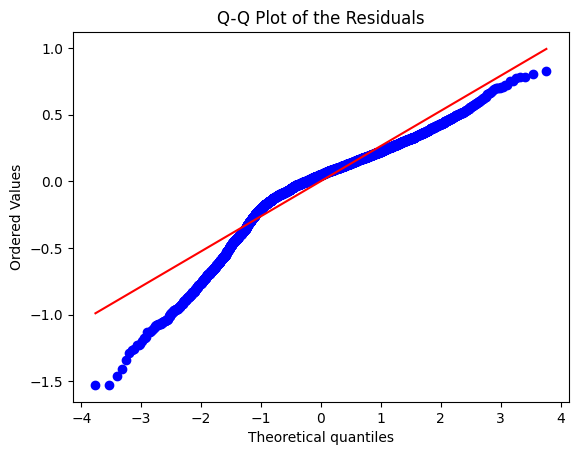

Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)


In [74]:
#Residual Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred_randomForest are defined as per your model's predictions

# Step 1: Calculate residuals
residuals = y_test - y_pred_randomForest

# Step 2: Visualize the residuals in a plot
plt.figure(figsize=(10, 6))
# Updated function call with keyword arguments for x and y
sns.residplot(x=y_pred_randomForest, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


# This scatter plot should not show any patterns. Patterns might indicate non-linearity,
# heteroscedasticity, or outliers. The lowess line (locally weighted scatterplot smoothing)
# helps visualize the trend.

# Step 3: Check for homoscedasticity
# The residuals should be scattered randomly around zero (the red line).
# If there's a pattern (like a funnel shape), the data may be heteroscedastic.

# Step 4: Test for normality
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_randomForest, residuals, color="g", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


# You can also use a Q-Q plot or conduct a formal statistical test:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of the Residuals')
plt.show()

# If the residuals are normally distributed, the points should fall approximately along a straight line.

# Perform a statistical test for normality
stat, p_value = stats.shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpret
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


In [75]:
#Check for Overfitting or Underfitting

train_error = np.sqrt(mean_squared_error(y_train, random_forest_Model.predict(X_train)))
test_error = randomForest_RMSE  # This should already be the test RMSE

print(f"Training RMSE: {train_error}")
print(f"Testing RMSE: {test_error}")

# Checking the difference between training and testing errors
if train_error < test_error:
    if test_error - train_error > 0.05 * train_error:
        print("There might be overfitting since the test error is significantly higher than the training error.")
    else:
        print("The model seems well-fitted as the test error is not significantly higher than the training error.")
elif train_error > test_error:
    print("The model might be underfitting as it performs better on the test set. This is unusual and might suggest issues with the data or model.")
else:
    print("The model has almost the same performance on both training and test sets, which is ideal.")


Training RMSE: 0.26888046442236424
Testing RMSE: 0.2752128470907271
The model seems well-fitted as the test error is not significantly higher than the training error.


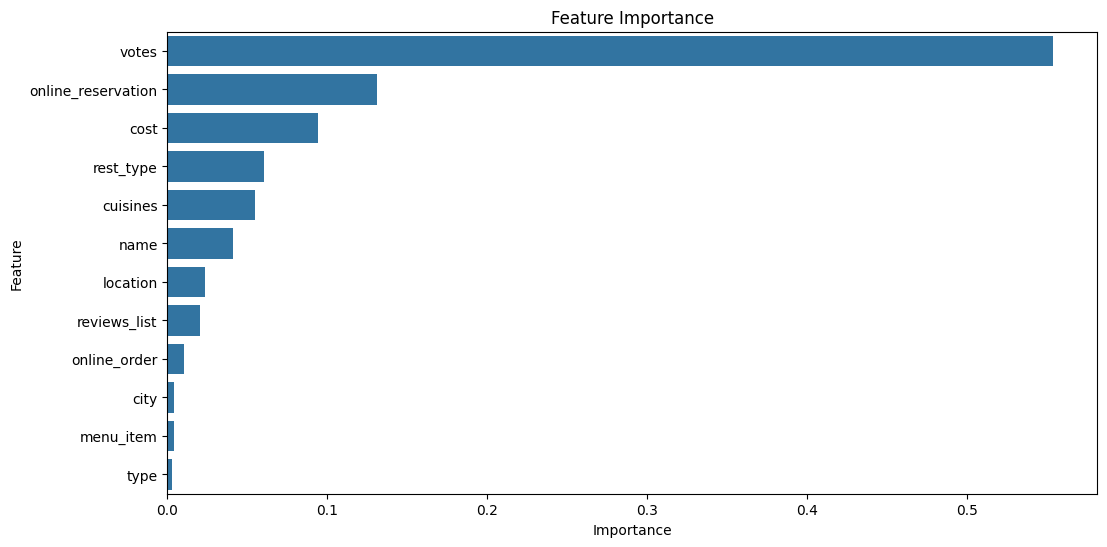

In [76]:
# Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = random_forest_Model.feature_importances_

# Convert the importances into a pandas DataFrame
feature_list = list(X_train.columns)
feature_importance_df = pd.DataFrame({'Feature': feature_list, 'Importance': importances})

# Sort the DataFrame to find the most important features based on importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
